## Part 0. Setup Steps

- Create a repo on GitHub named `eds217-trypy-02`
- Clone to create a version-controlled project
- Create some subfolder infrastructure (docs, data)
- Create a ~~new quarto in RStudio~~ new `.ipynb` file  called `eds217-trypy-02.ipynb` in VSCode. If working on your local machine, make sure to associate the notebook with the `eds217_2023` environment.


## Part 1. Checking data types


### Create some data, check the classes, index!

#### Vectors, lists & data frames

In your notebook (or quarto) document: 

1. Create a list called `vec_1`containing the following: 

`[2, 5, 9, 10, 8, 12, 1, 0]`

In [1]:
#| echo: false
#| eval: false

vec_1 = [2, 5, 9, 10, 8, 12, 1, 0]


Check the following for that list: 

- What is the type of the list? `type()`
- Access the 3rd element and store as `vec_1_e3`
- Access the 1st element and store as `vec_1_e1`
- Access the 5th through 7th elements and store as `vec_1_e5to7`
- Reassign each element in `vec_1` as a string and store the new list as `vec_1_char`. What does the output look like? 

In [2]:
#| echo: false
#| eval: false

print(type(vec_1))
vec_1_e3 = vec_1[2]
vec_1_e1 = vec_1[0]
vec_1_e5to7 = vec_1[4:7]
vec_1_char = [str(i) for i in vec_1]
print(vec_1_char)

<class 'list'>
['2', '5', '9', '10', '8', '12', '1', '0']


2. Create a dictionary called `dict_1`

`dict_1` should contained *named* elements, where `town = "Santa Barbara`, `location = "Rincon"`, `swell = "south"

- Take a look at what you've made
- What is the type of dictionary values? `type()`
- What is the length of dict_1?
- Access the 'location' value and store as `dict_1_v2`

In [3]:
#| echo: false
#| eval: false

dict_1 = {
    'town': 'Santa Barbara',
    'location': 'Rincon',
    'swell': 'south'
         }

len(dict_1)
dict_1_v2 = dict_1['location']

3. Create a data frame in pandas

Write code to create a data frame called `df_1` that looks like this:

(Note: translate the `R` code below into python... don't forget to `import pandas as pd`)
```{r, echo = FALSE}
df_1 <- data.frame(
    region = c("A", "B", "A", "D"),
    species = c("otter", "great white", "sea lion", "gray whale"),
    count = c(12, 2, 36, 6)
    )
df_1
max_count <- max(df_1$count)
```
- Find the maximum value of the `count` column, store as `max_count`

In [4]:
#| echo: false
#| eval: false

import pandas as pd

df_1 = pd.DataFrame({
    'region': ['A', 'B', 'A', 'D'],
    'species': ['otter', 'great white', 'sea lion', 'gray whale'],
    'count': [12, 2, 36, 6]
})
max_count = max(df_1['count'])
print(max_count)

36


## Part 2. Wild data

#### Set-up


- The *first CSV* listed (`AS00601.csv`) take a look at it (outside of python is fine as a first step, e.g. you can open the CSV in Excel.)

- Save the `AS00601.csv` in the `data` folder of your repo.

#### Read in the data

- Read in the data using `pd.read_csv()`, store as `mack_verts`

In [5]:
#| echo: false
#| eval: false
import pandas as pd

mack_verts = pd.read_csv("../../data/AS00601.csv")


- Look at what you've read in

#### A bit of wrangling & exploring


- In a new code chunk, practice accessing individual pieces of the data frame (there is no real functionality to this, but just to reinforce stuff we learned in our interactive session): 

  - Store the 5th value in column `"WEIGHT"` as `mc_wt_5`. Check by looking at your data frame to confirm.
  - Store the 8th - 20th value in the `"LENGTH1"` column as `mc_length_8_20`. Check by looking at your data frame to confirm. 
  - Store everything in column SAMPLEDATE as a `pd.Series` called `mc_dates`

In [6]:
#| echo: false
#| eval: false

mc_wt_5 = mack_verts.iloc[4]['WEIGHT']
mc_length_8_20 = mack_verts.loc[7:20]['LENGTH1']
mc_data = mack_verts['SAMPLEDATE']


#### Make a salamander subset

- Create a subset that only contains observations for Pacific Giant Salamanders (species *Dicamptodon tenebrosus*, stored in `SPECIES` as `DITE`). Store the subset as `mc_salamanders`. 

*Hint:* use a logical operator to filter for the rows you want.

For example, the following code block creates a new dataframe `df_new` containing only the rows in `df_old` where the value of column named `ID` is equal to `Batman`.

```{python}
    df_new = df_old[df_old['ID'] == 'Batman']
```

In [7]:
#| echo: false
#| eval: false

mc_salamanders = mack_verts[mack_verts['SPECIES'] == 'DITE']

#### Make a scatterplot of salamander length x weight

- Create a scatterplot of LENGTH1 (snout-vent length in millimeters) versus WEIGHT (grams) for all salamanders in the subset you created above, `mc_salamanders`. Update axis labels, title, subtitle, and add a caption with the data source. Customize point color and size, possibly opacity, and the style. 

/Users/kellycaylor/mambaforge/envs/eds217_2023/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


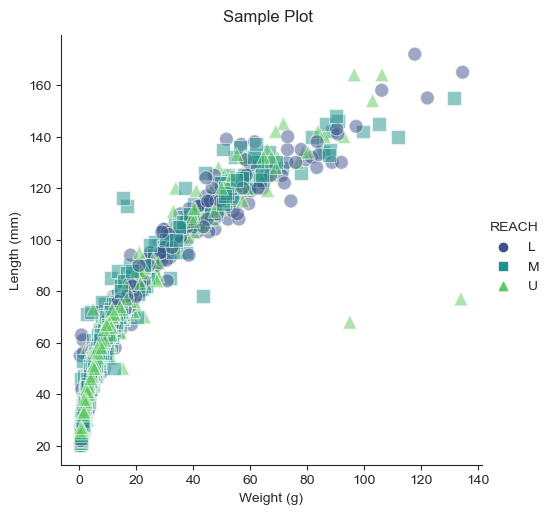

In [41]:
#| echo: false
#| eval: false

import seaborn as sns

# Customizing the relplot
g = sns.relplot(
    data=mc_salamanders,
    x='WEIGHT',
    y='LENGTH1',
    hue='REACH',  # Color by REACH
    style='REACH',  # Different markers for each REACH
    markers=['o', 's', '^'],  # Custom markers for each REACH
    palette='viridis',  # Use the viridis color palette
    s=100,  # Set marker size
    alpha=0.5  # Set opacity
)

g.set_axis_labels("Weight (g)", "Length (mm)")
g.fig.suptitle('Sample Plot', y=1.02);

- Export your scatterplot as `salamander_size.png` to your figs folder using the `fig.savefig()` command.

In [35]:
#| echo: false
#| eval: false 

g.savefig('salamander_size.png')

#### Make a cutthroat plot

- Similar to above, make a subset called `mc_trout` that only contains observations for cutthroat trout (species "ONCL")

*Note:* In the following, it is _way_ easier to make use of the [sns.relplot()](https://seaborn.pydata.org/tutorial/relational.html#showing-multiple-relationships-with-facets) command in the  `seaborn` library than matplotlib 

- Create a scatterplot of `"LENGHTH1"` by `"WEIGHT"` for all trout in the dataset
- Customize so that the point color depends on *reach*
    - `hue="REACH"` in `sns.relplot()`
- Facet your plot by creek reach 
    - `col="REACH"` in `sns.relplot()`
- store the output of `sns.relplot()` as `ax`
- Update facet plot axis labels and title
    - `ax.set_axis_labels(xlabel,ylabel)`
    - `ax.fig.suptitle(title)`
- Export your graph as `cutthroat_size.png` to the `figs` folder (`fig.savefig()`)

/Users/kellycaylor/mambaforge/envs/eds217_2023/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

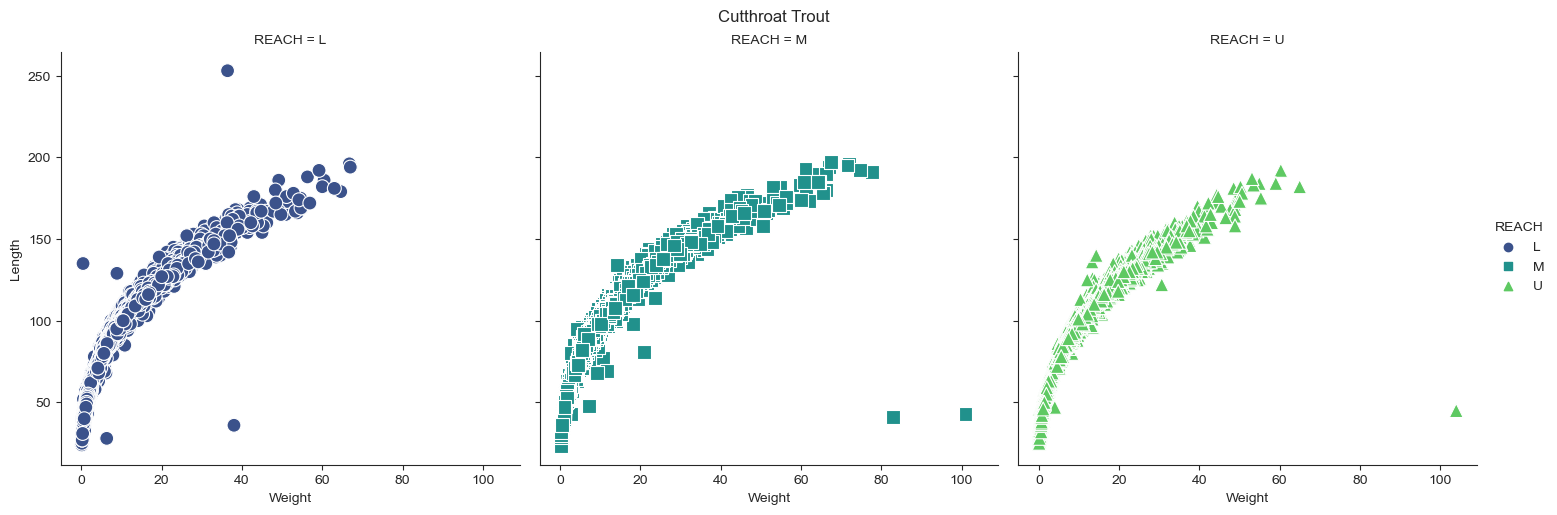

In [37]:
#| echo: false
#| eval: false 
from matplotlib import pyplot as plt
mc_trout = mack_verts[mack_verts['SPECIES'] == 'ONCL']
fig = plt.figure()
facet_grid = sns.relplot(
    data=mc_trout,
    x='WEIGHT',
    y='LENGTH1',
    col='REACH',
    hue='REACH',
    style='REACH',  # Different markers for each REACH
    markers=['o', 's', '^'],  # Custom markers for each REACH
    palette='viridis',  # Use the viridis color palette
    s=100  # Set marker size
)
facet_grid.set_axis_labels('Weight', 'Length')
facet_grid.fig.suptitle('Cutthroat Trout', y=1.02);